In [1]:
import numpy as np
import pandas as pd
import math
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from datetime import datetime
plt.rcParams['font.size'] = 14

CASE=2
if CASE==0: dname="DATA"
if CASE==1: 
    dname="DATA_b"
    _A=4
if CASE==2:
    dname="DATA_c"
    _A=6

fname=dname+'/x_RBM_q0.1.dat'
# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
#v0 = np.copy(v)
L0 = len(v[0])
n=math.ceil(math.log(_A)/math.log(2)) ##3
L = (n*len(v[0]))//_A   ## 15
data = np.zeros((len(v),L)) #10 is math.ceil(math.log(A)/math.log(2))*len(v0[0])//A
#c=0


for i in range(0, v.shape[1], _A): #4 is _A
    val=np.argmax(v[:, i:(i+_A)], axis=1)
    ## in general, should be done for math.ceil(math.log(A)/math.log(2)) times
    
    for j in range(n):
        print(n,i, j, len(v[0]),L)
        data[:, ((i*n)//_A)+j]=(val//(2**(n-j-1)))%2

data=data.astype(int)
#v0 = 4 - v0[:, range(0, v0.shape[1], 4)]
v0=np.copy(data)
with np.printoptions(threshold=np.inf):
    print(v[:10, :], data[:10, :], sep="\n")

# to start, take a small subsample
# v = v[1:11]
N = len(v)


#SPINS = True
SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0
    

# RBM, nr of hidden units
if CASE==0: M = 3
if CASE==1: M = 7
if CASE==2: M = 5
# range of each initial weight
sigma = sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
#print("w=",w);print("a=",a);print("b=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

3 0 0 30 15
3 0 1 30 15
3 0 2 30 15
3 6 0 30 15
3 6 1 30 15
3 6 2 30 15
3 12 0 30 15
3 12 1 30 15
3 12 2 30 15
3 18 0 30 15
3 18 1 30 15
3 18 2 30 15
3 24 0 30 15
3 24 1 30 15
3 24 2 30 15
[[0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]]
[[1 0 1 0 1 0 0 0 1 1 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 0 0 1 1 1 0 0]
 [0 0 0 1 0 1 1 0 1 0 1 0 0 0 0]
 [0 1 0 0 1 0 0 1 1 0 0 1 0 0 0]
 [1 0 0 0 1 0 0 1 0 1 0 0 0 1 0]
 [0 0 1 1 0 0 0

In [2]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [3]:
def rmsprop(data, model, s, beta, eps, l_rate_m):
    
    g = data - model
    s1 = beta*s + (1-beta)*g**2      
    d = l_rate_m * g/(np.sqrt(s1+eps))
      
    return s1, d

def adam(data, model, m, s, t, beta, eps, l_rate_m):
    
    g = data - model
    m0 = beta*m + (1-beta)*g
    s0 = beta*s + (1-beta)*g**2
    
    m1 = 1/(1-beta**(t+1))*m0
    s1 = 1/(1-beta**(t+1))*s0
    d = l_rate_m * m1/(np.sqrt(s1+eps))
      
    return m0, s0, d

In [4]:
import itertools

def Energy(v, h, w, a, b):
    return -np.dot(a, v) - np.dot(h, b) - np.dot(np.dot(v.T, w), h)

def PartZ(w, a, b):
    res = 0
    blocks = np.array([[(i//(2**j))%2 for j in range(L)] for i in range(2**L)])
    
    #print(blocks)
    #raise Exception
    #blocks = np.fliplr(np.eye(L))
    blocks[blocks == 0] = vmin
        
    # Create the OHEs
    #element = [b for b in blocks]
    # Create a list with all possible combinations 
    #combinations = list(itertools.product(element, repeat=n))
    # Create a matrix with all possible combinations of the OHEs
    #OHM = []
    #for c in combinations:
    #    row = []
    #    for e in c:
    #        row += [e]
    #    OHM.append(np.hstack(row))
        
    for i in range(2**M):
        h = np.array([(i // 2**j) % 2 for j in reversed(range(M))])
        h[h == 0] = vmin
        for v in blocks:
            res += np.exp(-Energy(v, h, w, a, b))
    
    return res

In [5]:
def dist(d1, d2):
    return np.abs(d1-d2).sum(axis=1)

def AAI(v0,v1,batch_len=10):
    bl=batch_len
    cg=0 ## count for generated data
    co=0 ## count for original data
    for n in range(len(v1)//bl):
        b1=v1[n*bl:(n+1)*bl,]
        b0=v0[n*bl:(n+1)*bl,]
        for i in range(len(b1)):
            b2=np.array([b1[i]]*len(b1))
            mask=np.array([k!=i for k in range(len(b1))])
            #print(b2, mask)
            d_st=min(dist(b2[mask],b0[mask]))
            d_ss=min(dist(b2[mask],b1[mask]))
            if d_ss<d_st:
                cg+=1
            elif d_ss==d_st:
                cg+=0.5
        
        for i in range(len(b0)):
            b2=np.array([b0[i]]*len(b0))
            mask=np.array([k!=i for k in range(len(b0))])
            d_tt=min(dist(b2[mask],b0[mask]))
            d_st=min(dist(b2[mask],b1[mask]))
            if d_tt<d_st:
                co+=1
            elif d_tt==d_st:
                co+=0.5
    
    co/=len(v0)
    cg/=len(v1)
    sigma_eps=2*np.sqrt(co/len(v0)*(co-0.5)**2+ cg/len(v1)*(cg-0.5)**2)
    return cg, co, (co-0.5)**2+(cg-0.5)**2, sigma_eps

In [6]:
def reconvert_data(data):
    one_hot = np.zeros((len(data),L0)) 
    for i in range(0, len(data[0]), n):
        val=np.zeros(len(data))
        for j in range(n):
            val+=data[:,i+j]*2**(n-j-1)
        try:
            for j in range(len(data)):
                one_hot[j, (i*_A//n)+val.astype(int)[j]]=1
            #print(i*_A//n + val)
        except:
            pass
    return one_hot


----------- epoch = 0   k= 499   m= 500
----------- epoch = 1   k= 499   m= 500


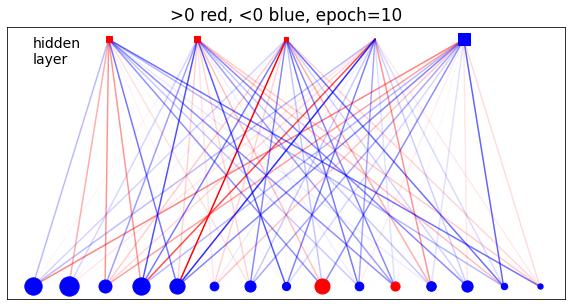

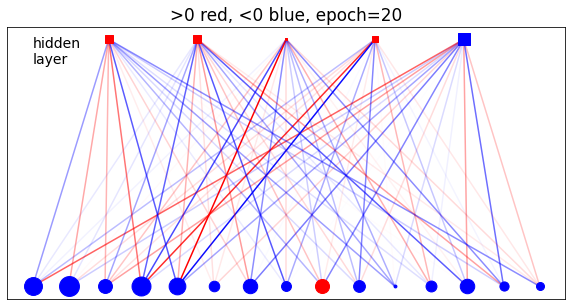

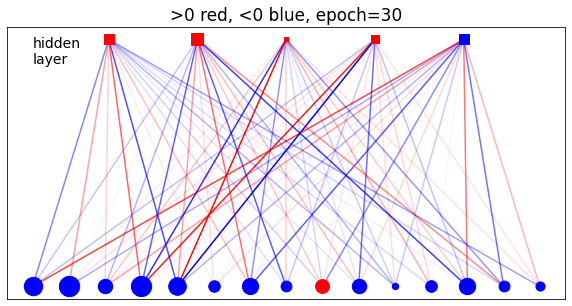

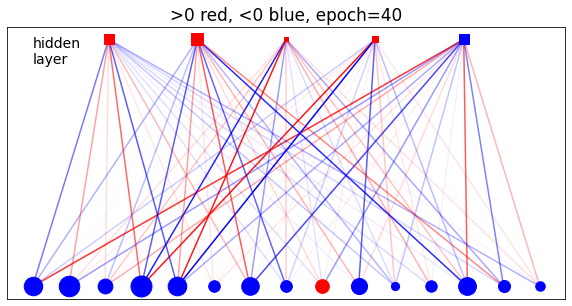

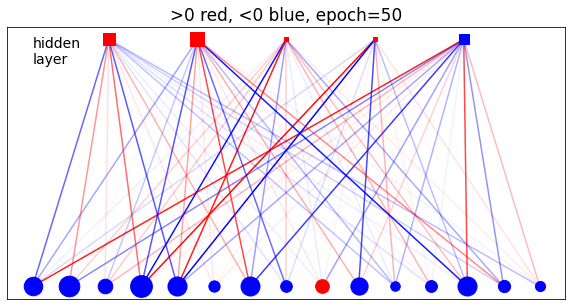

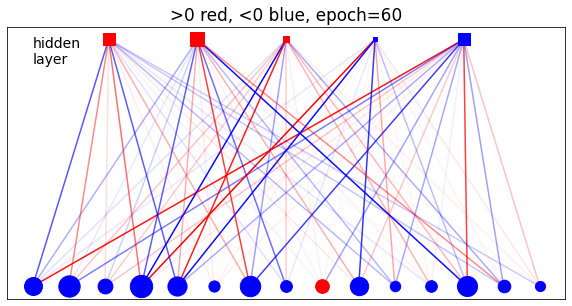

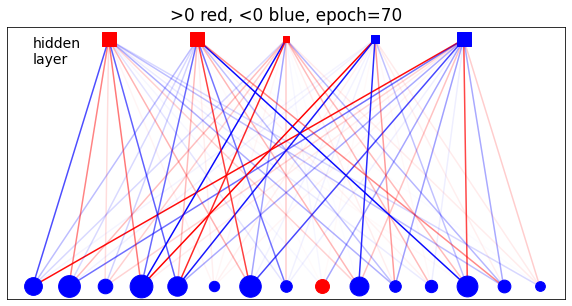

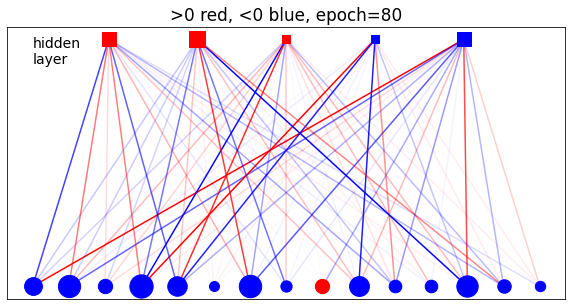

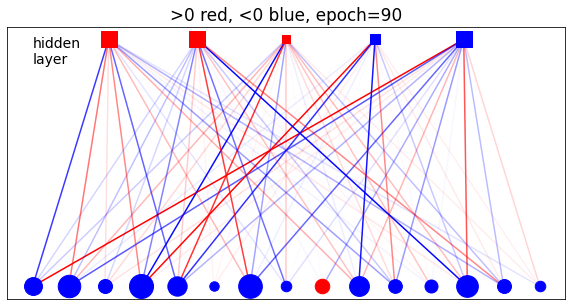

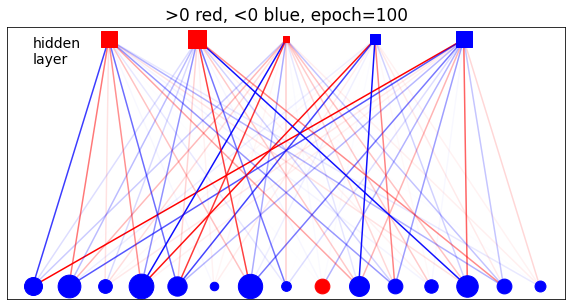

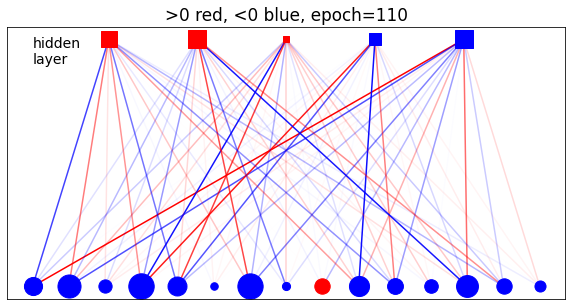

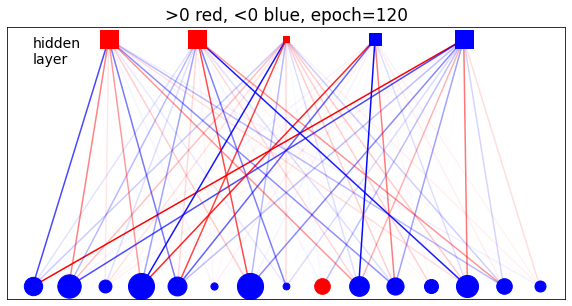

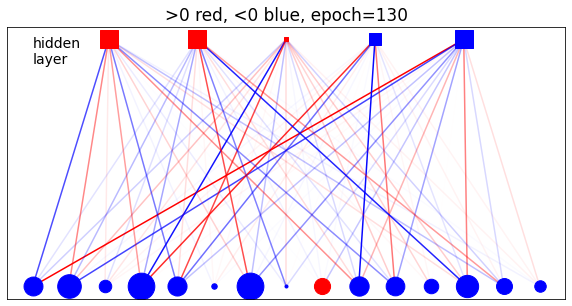

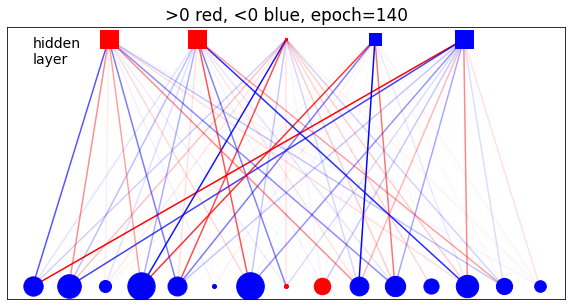

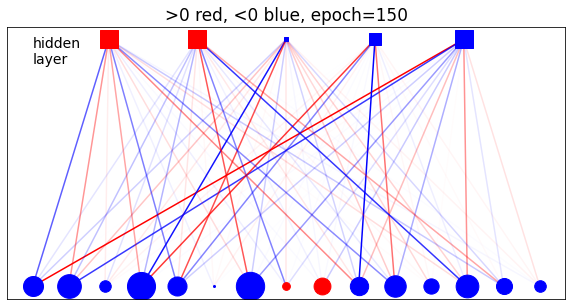

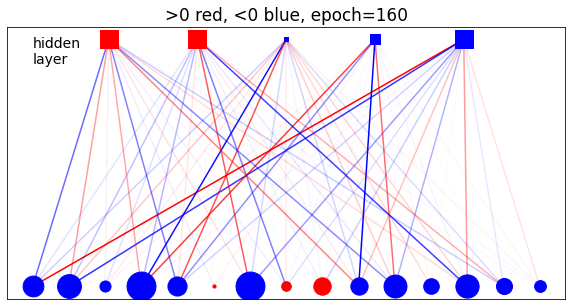

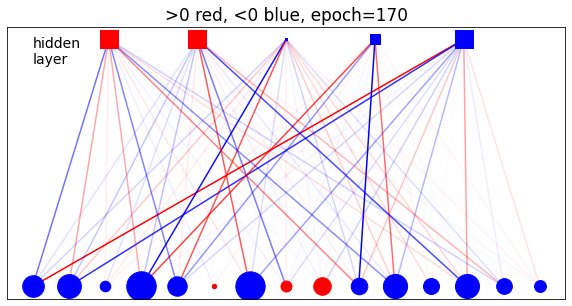

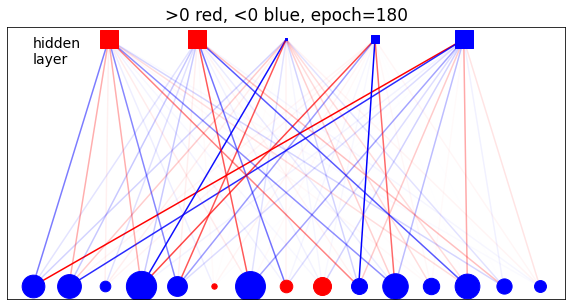

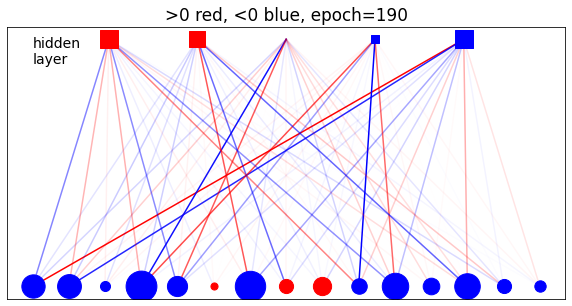

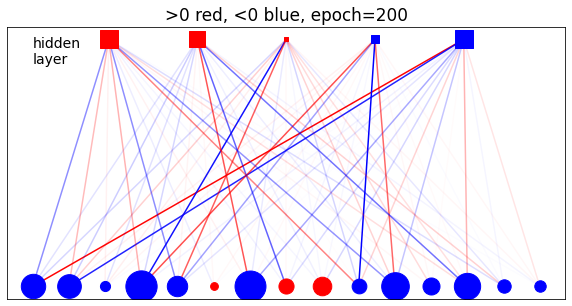

In [7]:
np.random.seed(12345)

# learning rate
l_rate = 1.0

# minibatch
mini, m = 500, 0

beta = 0.9
eps = 10**-8
sw, mw = 0, 0
sa, ma = 0, 0
sb, mb = 0, 0

rms=False
ad=True
div_steps=2
nepoch = 200
alist=[]
LogL = []
mean_energy = []
std_energy = []
logZlist = []

# train model
print('===================================================')
for epoch in range(nepoch):
    E=[]
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(data[k],w,b,GAP)
        # negative CD phase: generating fantasy vf
        vf = activate(h,w.T,a,GAP)
        for i in range(div_steps-1):
            hf = activate(vf,w,b,GAP)
            vf = activate(hf,w.T,a,GAP)
        # one more positive CD phase: generating fantasy h from fantasy vf 
        hf = activate(vf,w,b,GAP)
        
        E.append(Energy(data[k], h, w, a, b))
        
        v_data  += data[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(data[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with rmsprop
            if rms:
                sw, dw = rmsprop(vh_data, vh_model, sw, beta, eps, l_rate_m)
                sa, da = rmsprop(v_data, v_model, sa, beta, eps, l_rate_m)
                sb, db = rmsprop(h_data, h_model, sb, beta, eps, l_rate_m)
            
            if ad:
                mw, sw, dw = adam(vh_data, vh_model, mw, sw, epoch, beta, eps, l_rate_m)
                ma, sa, da = adam(v_data, v_model, ma, sa, epoch, beta, eps, l_rate_m)
                mb, sb, db = adam(h_data, h_model, mb, sb, epoch, beta, eps, l_rate_m)
                
            
            if epoch<=1 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                #print('dw =',dw)
                #print('da =',da)
                #print('db =',db)
            # basic step of vanilla gradient descent, from eq.(211)
            w = w + dw
            a = a + da
            b = b + db
            m=0
    
    logZ = np.log(PartZ(w, a, b))      
    mean_energy.append(np.mean(E))
    std_energy.append(np.std(E))
    logZlist.append(logZ)
    LogL.append(-np.mean(E)-logZ)
    alist.append(AAI(reconvert_data(data), reconvert_data(activate(activate(data,w,b,GAP), w.T,a,GAP))))
    # randomize the order of input data
    np.random.shuffle(data)
    # decrease the learning rate (here as a power law)
    if(rms==True): l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        if not ad:
            print('l_rate = ',l_rate)

In [8]:
from IPython.display import display_html 
import pandas as pd

ampl=40.

# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = activate(h,w.T,a,ampl*GAP)
# difference between fantasy and data
diff = (v1 - v0)/2
str0 = fname+'_M'+str(M)+'-mini'+str(mini)
np.savetxt(str0+".fantasy", (v1+1)/2, fmt='%d',delimiter=' ')  
np.savetxt(str0+'.diff', diff, fmt='%d',delimiter=' ')  


def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1
1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0
2,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0
3,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0
4,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
5,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1
6,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0
7,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
8,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
9,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1


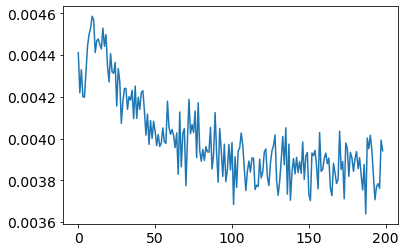

In [9]:
plt.plot([i[3] for i in alist][1:])

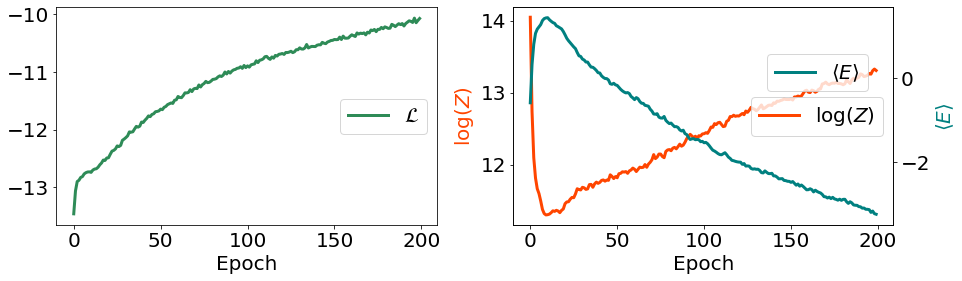

In [12]:
plt.rcParams['font.size'] = 20
fig, (ax, ax2) = plt.subplots(1,2,figsize=(15,4))
ax.plot(LogL, label='$\mathcal{L}$', c='seagreen', linewidth=3)
ax2.set_ylabel('$\mathcal{L}$', c='seagreen')
ax.set_xlabel('Epoch')
#ax.set_title(r'$\log(\mathcal{L})$')
ax.legend(loc='right')
ax.fill_between(np.arange(len(LogL)), LogL+np.array(std_energy)/np.sqrt(N), LogL-np.array(std_energy)/np.sqrt(N), facecolor='seagreen', alpha=0.5)
ax2.plot(logZlist, c='orangered', label='$\log(Z)$', linewidth=3)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('$\log(Z)$',c='orangered')
ax2.legend(loc='right')
ax3=ax2.twinx()
ax3.plot(mean_energy, label=r'$\langle E \rangle$',c='teal', linewidth=3)
ax3.fill_between(np.arange(len(mean_energy)), mean_energy+np.array(std_energy)/np.sqrt(N), mean_energy-np.array(std_energy)/np.sqrt(N), facecolor='darkblue', alpha=0.5)
ax3.set_ylabel(r'$\langle E \rangle$',c='teal')
ax3.legend(loc='center', bbox_to_anchor=(0.8, 0.7))
now = datetime.now()
plt.savefig('logl'+now.strftime("%d_%m_%Y%__%H_%M_%S")+'.pdf')


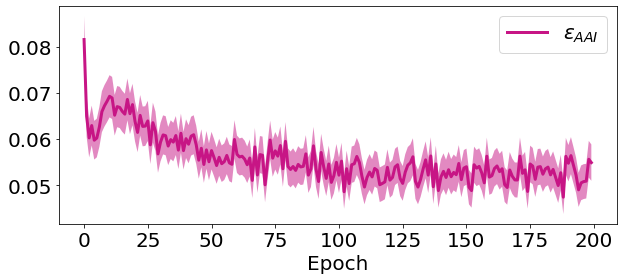

In [14]:
AAIlist=alist
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize=(10,4))
ax.plot([i[2] for i in AAIlist], label='$\epsilon_{AAI}$', c='mediumvioletred', linewidth=3)
ax.fill_between(np.arange(len(AAIlist)), [i[2] for i in AAIlist]+np.array([i[3] for i in AAIlist]), [i[2] for i in AAIlist]-np.array([i[3] for i in AAIlist]), facecolor='mediumvioletred', alpha=0.5)
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.savefig('epsilon'+now.strftime("%d_%m_%Y%__%H_%M_%S")+'.pdf')
plt.show()